### Dateset

- [Natural Earth’s physical vectors](https://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-physical-labels/) [[Github]](https://github.com/nvkelso/natural-earth-vector) (version 4.1.0)

### Package

- [geopandas](https://geopandas.org/)
- [shapely](https://shapely.readthedocs.io/en/stable/manual.html) (package for computational geometry)
- [rasterio](https://rasterio.readthedocs.io/en/latest/intro.html) (For accessing the many different kind of raster data files used in the GIS field)

- [swathprofile](http://jura.geologie.uni-freiburg.de//geomorphology/swathprofile.php)
- [pyosp](https://pyosp.readthedocs.io/en/latest/index.html)

### Reference
- Elsen, P. R., & Tingley, M. W. (2015). Global mountain topography and the fate of montane species under climate change. Nature Climate Change, 5(8), 772-776.

In [1]:
import numpy as np
import rasterio
from rasterio.mask import mask
import shapely
import os
from scipy.stats import skew

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
%matplotlib inline
#%matplotlib notebook

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# import sys 
# sys.path.append("..") 
# from ezgeopy import TopoGrid,Flow,Stream
# from ezgeopy import datafn as fn

In [2]:
outputfile = "Output_3_01_01_MountainShape/"
outputPath = os.path.join(os.path.abspath("."),outputfile) 
if not os.path.exists(outputPath):
    os.makedirs(outputPath)
    
# parameters for cartopy
rivers    = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m',edgecolor='Blue', facecolor="none")
coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '110m',edgecolor=(0.0,0.0,0.0),facecolor="none")
prj_base  = ccrs.PlateCarree()

# parameters for plot
xticks_global = np.arange(-180,180+10,60)
yticks_global = np.arange(-90,90+10,30)
xticks_area = np.arange(-180,180+2.5,2.5)
yticks_area = np.arange(-90,90+2.5,2.5)
xticks_area1 = np.arange(-180,180+5,5)
yticks_area1 = np.arange(-90,90+5,5)
dpi = 150

In [3]:
fname_shp = "../Data/ne_50m_geography_regions_polys/ne_50m_geography_regions_polys.shp"

In [4]:
import geopandas
shp = geopandas.read_file(fname_shp)
shp_Unitm = shp.to_crs("EPSG:32662")
shp

,featurecla,name,namealt,region,subregion,min_label,max_label,scalerank,label,wikidataid,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,Island group,MELANESIA,None,Oceania,Melanesia,3.0,6.0,0,None,Q37394,...,Melanezja,Melanésia,Меланезия,Melanesien,Melanezya,Melanesia,美拉尼西亚,5,1159104353,"MULTIPOLYGON (((-179.02882 -21.63896, -179.975..."
1,Island group,MICRONESIA,None,Oceania,Micronesia,3.0,6.0,0,None,Q3359409,...,Mikronezja,Micronésia,Микронезия,Mikronesien,Mikronezya,Micronesia,密克罗尼西亚群岛,5,1159104355,"POLYGON ((173.73011 10.00922, 176.61524 4.8877..."
2,Island group,POLYNESIA,None,Oceania,Polynesia,2.0,6.0,0,None,Q35942,...,Polinezja,Polinésia,Полинезия,Polynesien,Polinezya,Polynesia,玻里尼西亞,5,1159104359,"MULTIPOLYGON (((179.99989 -46.64324, 167.21559..."
3,Continent,SOUTH AMERICA,None,South America,None,0.0,4.0,0,SOUTH AMERICA,Q18,...,Ameryka Południowa,América do Sul,Южная Америка,Sydamerika,Güney Amerika,Nam Mỹ,南美洲,3,1159104361,"POLYGON ((-68.04112 10.52866, -67.96526 10.475..."
4,Continent,AUSTRALIA,None,Oceania,Australasia,0.0,3.0,0,AUSTRALIA,Q3960,...,Australia,Austrália,Австралия,Australien,Avustralya,Châu Úc,澳大利亞洲,3,1159104363,"POLYGON ((145.46705 -15.05816, 146.69105 -18.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Range/mtn,Scott Mountains,None,Antarctica,None,5.3,9.0,4,Scott Mountains,Q6111566,...,None,None,None,Scott Mountains,None,None,斯科特山脈,3,1159104511,"POLYGON ((51.29090 -67.42645, 51.10304 -67.830..."
518,Range/mtn,Napier Mountains,None,Antarctica,None,5.3,9.0,4,Napier Mountains,Q5306381,...,None,None,None,Napier Mountains,None,None,內皮爾山脈,3,1159104513,"POLYGON ((54.62794 -66.06854, 55.37904 -66.155..."
519,Range/mtn,Shackleton Range,None,Antarctica,None,5.3,9.0,4,Shackleton Range,Q1550766,...,None,Cordilheira Shackleton,None,Shackletonkjeda,None,None,沙克爾頓山脈,3,1159104515,"POLYGON ((-20.04162 -80.11706, -18.52709 -80.3..."
520,Lake,GREAT LAKES,None,North America,None,3.5,6.0,4,GREAT LAKES,Q7347,...,Wielkie Jeziora Północnoamerykańskie,Grandes Lagos da América do Norte,Великие озёра,Stora sjöarna,Büyük Göller,Ngũ Đại Hồ,五大湖,3,1159104615,"POLYGON ((-83.40429 43.81367, -83.45250 43.764..."


/home/nl/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/home/nl/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)


Number of plateaus: 45
Number of montains: 129


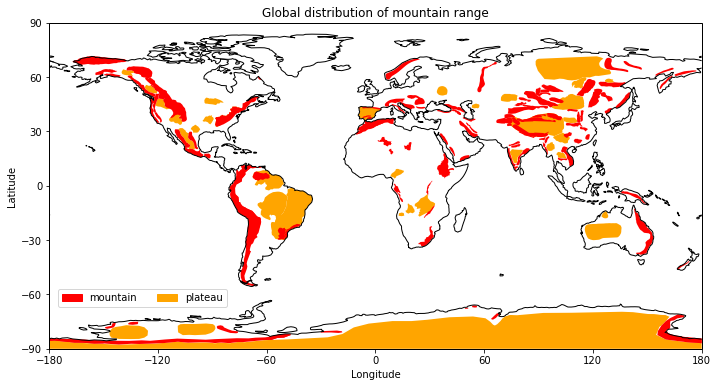

In [5]:
figname="Global distribution of mountain range"
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = plt.axes(projection=prj_base)
ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=figname)
ax.set_global()

crs = prj_base

index = []
for i, featurecla in enumerate(shp.featurecla):
    if featurecla == 'Plateau':
        geom_type= shp.geom_type[i] 
        if geom_type == 'MultiPolygon':
            sp = cartopy.feature.ShapelyFeature(shp.geometry[i], crs)
        elif geom_type == 'Polygon': 
            sp = cartopy.feature.ShapelyFeature([shp.geometry[i]], crs)  
        else:
            pass
        ax.add_feature(sp,facecolor="orange")
        index.append(i)
print("Number of plateaus: {}".format(len(index)))

index = []
for i, featurecla in enumerate(shp.featurecla):
    if featurecla == 'Range/mtn':
        geom_type= shp.geom_type[i] 
        if geom_type == 'MultiPolygon':
            sp = cartopy.feature.ShapelyFeature(shp.geometry[i], crs)
        elif geom_type == 'Polygon': 
            sp = cartopy.feature.ShapelyFeature([shp.geometry[i]], crs)  
        else:
            pass
        ax.add_feature(sp,facecolor="red")
        index.append(i)
print("Number of montains: {}".format(len(index)))
        
# ### alternative way of reading file using shpreader in cartopy
# import cartopy.io.shapereader as shpreader
# reader = shpreader.Reader(fname)
# shapes = reader.records()
# crs = prj_base
# for i, shape in enumerate(shapes):
#     if shape.attributes['featurecla'] == 'Plateau':
#         geom_type= shape.geometry.geom_type  
#         if geom_type=='MultiPolygon':
#             sp = cartopy.feature.ShapelyFeature(shape.geometry, crs)
#         elif geom_type=='Polygon': 
#             sp = cartopy.feature.ShapelyFeature([shape.geometry], crs)  
#         else:
#             pass
#         ax.add_feature(sp,facecolor="orange")
        
# reader = shpreader.Reader(fname)
# shapes = reader.records()
# crs = prj_base
# for i, shape in enumerate(shapes):
#     if shape.attributes['featurecla'] == 'Range/mtn':
#         geom_type= shape.geometry.geom_type  
#         if geom_type=='MultiPolygon':
#             sp = cartopy.feature.ShapelyFeature(shape.geometry, crs)
#         elif geom_type=='Polygon': 
#             sp = cartopy.feature.ShapelyFeature([shape.geometry], crs)  
#         else:
#             pass
#         ax.add_feature(sp,facecolor="red")
        
color  = ['red','orange']
labels = ['mountain', 'plateau']
patches = [ mpl.patches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(color)) ] 
ax.legend(handles=patches, bbox_to_anchor=(0.28,0.20), ncol=4) #loc='upper left') 

ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
                
plt.savefig((outputPath+figname+'.png'),dpi=dpi,bbox_inches='tight')

In [6]:
shp.name[index]

26         GREAT DIVIDING RANGE
27                         ALPS
28                    TIAN SHAN
29               URAL MOUNTAINS
30                CAUCASUS MTS.
                 ...           
514                 Ford Ranges
516    Prince Charles Mountains
517             Scott Mountains
518            Napier Mountains
519            Shackleton Range
Name: name, Length: 129, dtype: object

In [7]:
mtn_name = "ALPS" #"ANDES" #"ANDES" #"ALPS"

for ii, name in enumerate(shp.name):
    if name == mtn_name:
        print("The index of {}: {}".format(mtn_name,ii))
        i=ii

The index of ALPS: 27


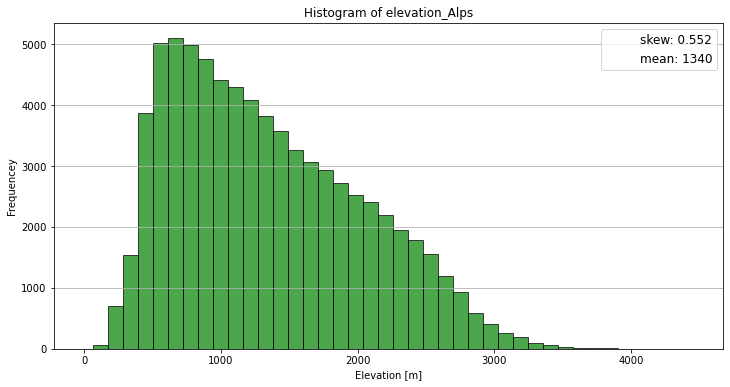

In [8]:
#i = 32
name = shp.name_en[i]
if name:
    name = name
else:
    name = shp.name[i]
geom = shp.geometry[i]
geom_map = [shapely.geometry.mapping(geom)]
#fname_src = "../Data/ETOPO5.tif"

fname_src = "../../../Data/DEM/ETOPO1_Bed_g_geotiff.tif"
with rasterio.open(fname_src) as src:
     out_image, out_transform = mask(src, geom_map, crop=True)
#plt.imshow(out_image[0,:,:])

data = out_image[0,:,:]
no_data = 0.
row, col = np.where(data != no_data ) 
elev = np.extract(data != no_data, data)

# rc2xy = lambda r, c: (c, r) * out_transform
# d = geopandas.GeoDataFrame({'col':col,'row':row,'elev':elev})
# # coordinate transformation
# d['x'] = d.apply(lambda row: rc2xy(row.row,row.col)[0], axis=1)
# d['y'] = d.apply(lambda row: rc2xy(row.row,row.col)[1], axis=1)

fname_fig = "Histogram of elevation_"+name
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.hist(elev,bins=40, facecolor="green", edgecolor="black", alpha=0.7)
ax.set_xlabel("Elevation [m]")
ax.set_ylabel("Frequencey")
ax.grid(axis="y")
ax.set_title(fname_fig)
ax.scatter(0,0,s=1,label="skew: "+str(np.around(skew(elev),decimals=3)),alpha=0)
ax.scatter(0,0,s=1,label="mean: "+str(np.int(elev.mean())),alpha=0)
plt.legend(loc = 'upper right',prop = {'size':12}) 
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

In [9]:
# import sys 
# sys.path.append("..") 
# from ezgeopy import datafn as fn

# # calculate the are of each cell
# xcoord,ycoord = geom.centroid.coords.xy[0][0],geom.centroid.coords.xy[1][0] #take the centorid of the geom for example
# dx,dy = 1/60,1/60

# w1 = fn.cal_dis_LngLat(xcoord-dx/2,ycoord+dy/2,xcoord+dx/2,ycoord+dy/2)
# w2 = fn.cal_dis_LngLat(xcoord-dx/2,ycoord-dy/2,xcoord+dx/2,ycoord-dy/2)
# h  = fn.cal_dis_LngLat(xcoord,ycoord-dy/2,xcoord,ycoord+dy/2)
# area = (w1+w2)*h/2
# print(area,w1,w2,h)

# dx,dy = 1,1
# w1 = fn.cal_dis_LngLat(xcoord-dx/2,ycoord+dy/2,xcoord+dx/2,ycoord+dy/2)
# w2 = fn.cal_dis_LngLat(xcoord-dx/2,ycoord-dy/2,xcoord+dx/2,ycoord-dy/2)
# h  = fn.cal_dis_LngLat(xcoord,ycoord-dy/2,xcoord,ycoord+dy/2)
# area = (w1+w2)*h/2
# print(area,w1,w2,h)

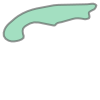

In [10]:
geom

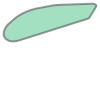

In [11]:
geomCH = geom.convex_hull
geomCH

In [12]:
# https://gis.stackexchange.com/questions/171242/average-width-of-irregular-polygons-qgis-2-12-0-lyon
import sympy
print(sympy.solve('2*x**2  - p*x+2*a','x'))


geom_Unitm = shp_Unitm.geometry[i]
p =  geom_Unitm.length/1000
a =  geom_Unitm.area/1000000

w,l = p/4 - np.sqrt(np.abs(-16*a + p**2))/4, p/4 + np.sqrt(np.abs(-16*a + p**2))/4
print(w,l)

[p/4 - sqrt(-16*a + p**2)/4, p/4 + sqrt(-16*a + p**2)/4]
197.81865412560478 1294.498569217219


In [13]:
from shapely.geometry import Polygon
polygon = Polygon([(0, 0), (1, 1), (1, 0)])
polygon

p = polygon.length
a = polygon.area

p/4 - np.sqrt(-16*a + p**2)/4, p/4 + np.sqrt(-16*a + p**2)/4

(0.37548081180081283, 1.3316259693857346)

In [14]:
# from scipy.stats import norm
# from sklearn.neighbors import KernelDensity
# from sklearn.utils.fixes import parse_version


# data = elev.reshape(-1, 1)

# fname_fig = "Histogram of elevation_"+name
# fig, ax = plt.subplots(1, 1, figsize=(12,6))
# #ax.hist(elev,bins=40, facecolor="green", edgecolor="black", alpha=0.7)

# kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(data)
# log_dens = kde.score_samples(data)
# ax.fill(data, np.exp(log_dens), fc='#AAAAFF')

# ax.set_xlabel("Elevation [m]")
# ax.set_ylabel("Frequencey")
# ax.grid(axis="y")
# ax.set_title(fname_fig)
# #plt.legend(loc = 'upper right',prop = {'size':8}) 
# plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

/home/nl/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/home/nl/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)


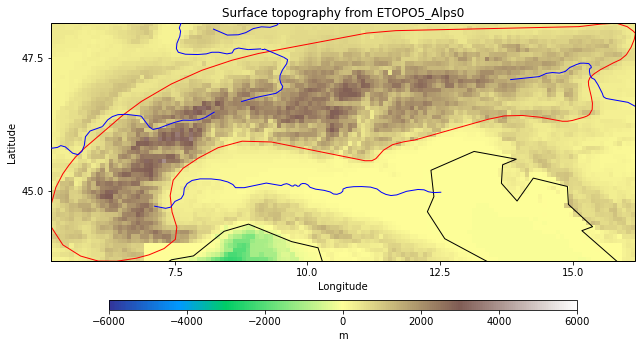

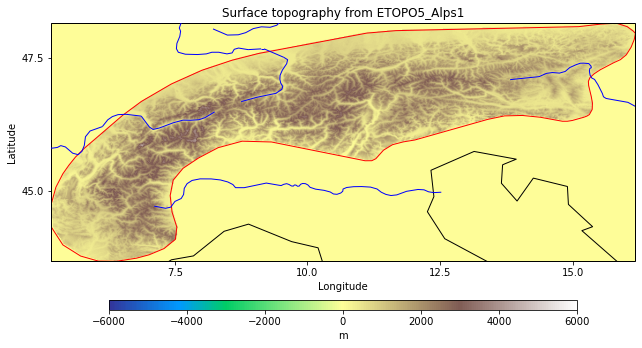

In [15]:
def plot_map(data,extent_img,extent_fig,cmap,vmin,vmax,unit,figname):
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    ax = plt.axes(projection=prj_base)
    ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_area,yticks=yticks_area,title=figname)
    #ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_area1,yticks=yticks_area1,title=figname)
    ax.set_extent(extent_fig)
    #ax.set_global()
    m=ax.imshow(data, origin='lower',cmap=cmap,vmin=vmin,vmax=vmax,extent=extent_img, transform=prj_base)
    cbr = plt.colorbar(mappable=m, orientation='horizontal',pad=0.12,shrink=0.7, aspect=50)
    #cbr = plt.colorbar(mappable=m, orientation='vertical',pad=0.12,shrink=0.7, aspect=50)
    cbr.set_label(unit)
    ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
    ax.add_feature(rivers, linewidth=1.0, edgecolor="Blue", zorder=5)
    
    geom_type= geom.geom_type  
    if geom_type=='MultiPolygon':
        sp = cartopy.feature.ShapelyFeature(geom, prj_base)
    elif geom_type=='Polygon': 
        sp = cartopy.feature.ShapelyFeature([geom], prj_base) 
    ax.add_feature(sp,facecolor='none', edgecolor='red')

    plt.savefig((outputPath+figname+'.png'),dpi=dpi,bbox_inches='tight')

from osgeo import gdal
fname = "../Data/ETOPO5.tif"
gtiff = gdal.Open(fname)
width = gtiff.RasterXSize
height = gtiff.RasterYSize
gt = gtiff.GetGeoTransform()
img = np.flipud(gtiff.GetRasterBand(1).ReadAsArray())

minlon,maxlat = gt[0],gt[3]
dlon,dlat = gt[1], -gt[5]   #dlon,dlat = 5/60,5/60
nlon,nlat = img.shape[1],img.shape[0]
maxlon = minlon+dlon*nlon
minlat = maxlat-dlat*nlat
extent = (minlon,maxlon,minlat,maxlat)

extent_topo0 = extent
dlon_topo0,dlat_topo0 = dlon,dlat
data_topo0 = img

bounds = geom.bounds
extent_area = (bounds[0],bounds[2],bounds[1],bounds[3])

figname = "Surface topography from ETOPO5_"+name + "0"
plot_map(data_topo0,extent_topo0,extent_area,cm.terrain,-6000,6000,"m",figname)

figname = "Surface topography from ETOPO5_"+name + "1"
plot_map(np.flipud(data),extent_area,extent_area,cm.terrain,-6000,6000,"m",figname)

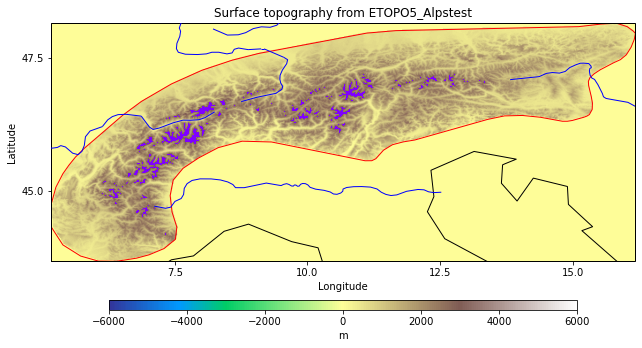

In [16]:
figname = "Surface topography from ETOPO5_"+name + "test"


data_img = np.flipud(data.copy())
extent_img,extent_fig,cmap,vmin,vmax,unit = extent_area,extent_area,cm.terrain,-6000,6000,"m"

data_img2 = data_img.copy().astype(np.float)
data_img2[data_img2<2500]=np.nan


fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = plt.axes(projection=prj_base)
ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_area,yticks=yticks_area,title=figname)
#ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_area1,yticks=yticks_area1,title=figname)
ax.set_extent(extent_fig)
#ax.set_global()
m=ax.imshow(data_img, origin='lower',cmap=cmap,vmin=vmin,vmax=vmax,extent=extent_img, transform=prj_base)
cbr = plt.colorbar(mappable=m, orientation='horizontal',pad=0.12,shrink=0.7, aspect=50)
#cbr = plt.colorbar(mappable=m, orientation='vertical',pad=0.12,shrink=0.7, aspect=50)
cbr.set_label(unit)
ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
ax.add_feature(rivers, linewidth=1.0, edgecolor="Blue", zorder=5)

m2=ax.imshow(data_img2, origin='lower',cmap=cm.rainbow,vmin=0.,vmax=0.,extent=extent_img, transform=prj_base)
# cbr = plt.colorbar(mappable=m2, orientation='horizontal',pad=0.12,shrink=0.7, aspect=50)

geom_type= geom.geom_type  
if geom_type=='MultiPolygon':
    sp = cartopy.feature.ShapelyFeature(geom, prj_base)
elif geom_type=='Polygon': 
    sp = cartopy.feature.ShapelyFeature([geom], prj_base) 
ax.add_feature(sp,facecolor='none', edgecolor='red')

plt.savefig((outputPath+figname+'.png'),dpi=dpi,bbox_inches='tight')

In [17]:
99=1

SyntaxError: can't assign to literal (<ipython-input-17-b935cfd45228>, line 1)

In [18]:
# https://gis.stackexchange.com/questions/260304/extract-raster-values-within-shapefile-with-pygeoprocessing-or-gdal

index = []
elevs_mean = []
elevs_max = []
ws = []
ls = []


for i, featurecla in enumerate(shp.featurecla):
    if featurecla == 'Range/mtn':
        name = shp.name_en[i]
        if name:
            name = name
        else:
            name = shp.name[i]
        geom = shp.geometry[i]
        geom_map = [shapely.geometry.mapping(geom)]
        #fname_src = "../Data/ETOPO5.tif"
        fname_src = "../../../Data/DEM/ETOPO1_Bed_g_geotiff.tif"
        with rasterio.open(fname_src) as src:
             out_image, out_transform = mask(src, geom_map, crop=True)
        #plt.imshow(out_image[0,:,:])
        
        data = out_image[0,:,:]
        no_data = 0.
        row, col = np.where(data != no_data ) 
        elev = np.extract(data != no_data, data)
        
        # rc2xy = lambda r, c: (c, r) * out_transform
        # d = geopandas.GeoDataFrame({'col':col,'row':row,'elev':elev})
        # # coordinate transformation
        # d['x'] = d.apply(lambda row: rc2xy(row.row,row.col)[0], axis=1)
        # d['y'] = d.apply(lambda row: rc2xy(row.row,row.col)[1], axis=1)
        
        fname_fig = "Histogram of elevation_"+name
        fig, ax = plt.subplots(1, 1, figsize=(12,6))
        ax.hist(elev,bins=40, facecolor="green", edgecolor="black", alpha=0.7)
        ax.set_xlabel("Elevation [m]")
        ax.set_ylabel("Frequencey")
        ax.grid(axis="y")
        ax.set_title(fname_fig)
        ax.scatter(0,0,s=1,label="skew: "+str(np.around(skew(elev),decimals=3)),alpha=0)
        ax.scatter(0,0,s=1,label="mean: "+str(np.int(elev.mean())),alpha=0)
        plt.legend(loc = 'upper right',prop = {'size':12}) 
        plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')
        plt.close()
        
    
        # acoording to perimeter and area to evaluate width and length
        
        geom_Unitm = shp_Unitm.geometry[i]
        
        p =  geom_Unitm.length/1000
        a =  geom_Unitm.area/1000000
       
        w,l = p/4 - np.sqrt(np.abs(-16*a + p**2))/4, p/4 + np.sqrt(np.abs(-16*a + p**2))/4
 
        index.append(i)
        elevs_mean.append(np.int(elev.mean()))
        elevs_max.append(np.int(elev.max()))
        ws.append(np.around(w,decimals=2))
        ls.append(np.around(l,decimals=2))
        
        if len(index)%10==0:
            print("finished i: {}".format(i))

names = shp.name[index]

finished i: 56
finished i: 88
finished i: 130
finished i: 201
finished i: 211
finished i: 221
finished i: 231
finished i: 405
finished i: 415
finished i: 425
finished i: 435
finished i: 445


In [19]:
EW = np.array(ws)/np.log((np.array(elevs_max)/300))

fpath_save = outputPath+'mountaindata.txt'
out_arr = np.array((index, ws, ls,elevs_mean,elevs_max,EW,names)).T
cab = "index;width;length;meanElev;maxElev;Ew;name"
np.savetxt(fpath_save, out_arr,fmt='%3i %8.2f %8.2f %4i %4i %8.2f %s', header=cab)   

fpath_save = outputPath+'mountaindata_name.txt'
out_arr = np.array(names).T
cab = "name"
np.savetxt(fpath_save, out_arr,fmt='%s', header=cab,delimiter=',')   

In [20]:
fpath_save = outputPath+'mountaindata_name.txt'
name_plot = np.loadtxt(fpath_save,dtype='str',delimiter=',')

fpath_save = outputPath+'mountaindata.txt'
data = np.loadtxt(fpath_save, usecols=[0,1,2,3,4,5])

index_plot = data[:,0]
ws_plot = data[:,1]
ls_plot = data[:,2]
elevmean_plot = data[:,3]
elevmax_plot = data[:,4]
EW_plot = data[:,5]

The shape of the mountians shape of the section is formed of two symmetric downward exponential curves:

$y = h_{peak}exp^{(-ln(2)\frac{x}{w_{half}})}$

Acoodring to the boundary contion: $h_{min}=h_{peak}e^{(-ln(2)\frac{w_{report}}{w_{half}})}$, where $h_{min} =0.3 km$, then: 

$w_{half}=1/2\frac{ln(2)}{ln(\frac{h_{peak}}{h_{min}})}$

Can define one parameter named equivalent width $EW$, which satisfies

$h_{peak}EW = 2\int_{0}^{\infty} h_{peak} e ^{-ln(2)\frac{x}{w_{half}}}$

This equation gives:

$EW = \frac{w_{report}}{ln(\frac{h_{peak}}{h_{min}})}$


After computing two cases (Himalayas and Alps) in real world, the EW for both cases is around 80 km. 

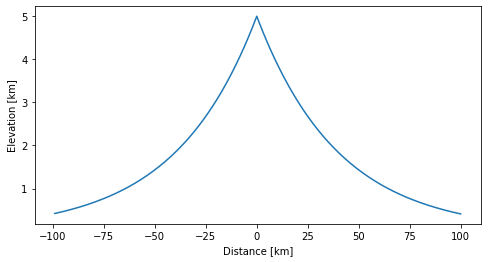

In [21]:
x = np.arange(100,-100,-1)
h_peak = 5
w_equ  = 80
w_half = 1/2*np.log(2)*w_equ

y = h_peak * np.exp(-np.log(2)*(np.abs(x)/w_half))

figname = "Mountain Shape (Distance vs Elevation)"
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.set(xlabel='Distance [km]', ylabel='Elevation [km]') #,xticks=xticks,yticks=yticks,title=fname_fig)
ax.plot(x,y)
plt.savefig((outputPath+figname+'.png'),dpi=dpi,bbox_inches='tight')

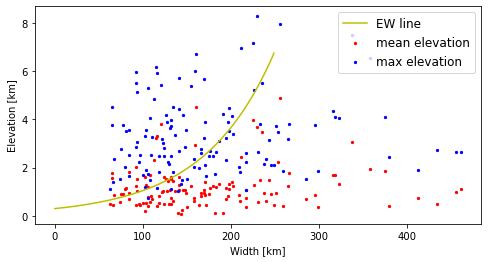

In [22]:
xx = np.arange(0,250,1)
yy = 0.3*np.exp(1/80*xx)

figname = "Width vs elevation"
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.set(xlabel='Width [km]', ylabel='Elevation [km]') #,xticks=xticks,yticks=yticks,title=fname_fig)
ax.scatter(ws_plot ,elevmean_plot/1000,s =5, color="red",label="mean elevation")
ax.scatter(ws_plot ,elevmax_plot/1000,s =5, color="blue",label="max elevation")
ax.plot(xx,yy,c="y",label="EW line")
#plt.axis(extent_fig)
plt.legend(loc = 'upper right',prop = {'size':12}) 
plt.savefig((outputPath+figname+'.png'),dpi=dpi,bbox_inches='tight')

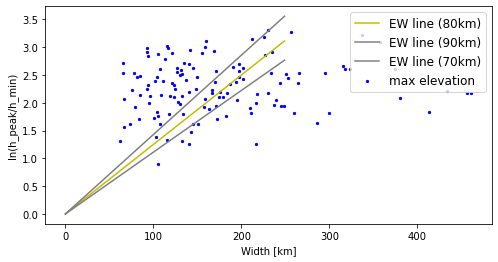

In [23]:
xx = np.arange(0,250,1)
yy0 = 1/80*xx
yy1 = 1/90*xx
yy2 = 1/70*xx

figname = "EW line"
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.set(xlabel='Width [km]', ylabel='ln(h_peak/h_min)') #,xticks=xticks,yticks=yticks,title=fname_fig)
#ax.scatter(ws_plot ,elevmean_plot/1000,s =5, color="red",label="mean elevation")
ax.scatter(ws_plot ,np.log(elevmax_plot/300),s =5, color="blue",label="max elevation")
ax.plot(xx,yy0,c="y",label="EW line (80km)")
ax.plot(xx,yy1,c="grey",label="EW line (90km)")
ax.plot(xx,yy2,c="grey",label="EW line (70km)")
#plt.axis(extent_fig)
plt.legend(loc = 'upper right',prop = {'size':12}) 
plt.savefig((outputPath+figname+'.png'),dpi=dpi,bbox_inches='tight')

In [24]:
EW_index = np.where(np.logical_and(EW_plot>70,EW_plot<90))
print(name_plot[EW_index])
print(index_plot[EW_index])

['ALPS' 'Transantarctic Mountains' 'ZAGROS MOUNTAINS' 'PAMIRS'
 'KARAKORAM RA.' 'COAST MOUNTAINS' 'Ellsworth Mountains' 'DRAKENSBERG'
 'CRYSTAL MOUNTAINS' 'TIBESTI MTS.' 'AHAGGAR MTS.' 'Central Highlands'
 'QUILIAN MOUNTAINS' 'Dabie Mts.' 'Wuyi Mts.' 'HEJAZ MTS.'
 'Sierra Madre del Sur' 'SIERRA MADRE ORIENTAL' 'SELWYN MTS.'
 'COLUMBIA MTS.' 'Hamgyong Mts.' 'Western Sayan Mts.' 'Lüliang Mts.'
 'Dângrêk Ra.' 'Prince Albert Mountains' 'Flood Range' 'Napier Mountains']
[ 27.  56.  80.  86.  88.  93. 128. 195. 196. 197. 198. 204. 205. 208.
 213. 216. 223. 225. 409. 410. 414. 421. 425. 428. 509. 513. 518.]


/home/nl/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/home/nl/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)


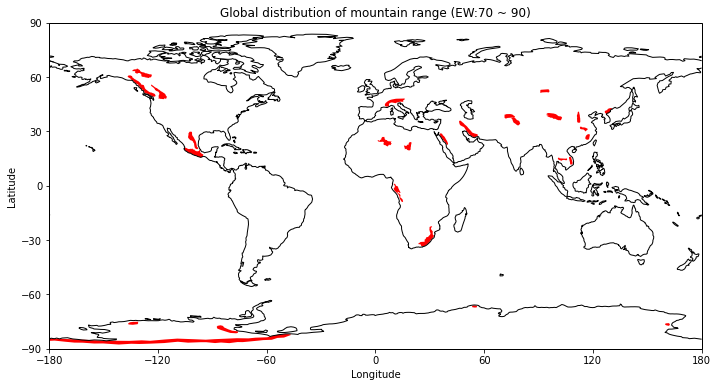

In [26]:
figname="Global distribution of mountain range (EW:70 ~ 90)"
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = plt.axes(projection=prj_base)
ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=figname)
ax.set_global()

crs = prj_base

index = []
for i, idx in enumerate((index_plot[EW_index]).astype(int)):
        geom_type= shp.geom_type[idx] 
        if geom_type == 'MultiPolygon':
            sp = cartopy.feature.ShapelyFeature(shp.geometry[idx], crs)
        elif geom_type == 'Polygon': 
            sp = cartopy.feature.ShapelyFeature([shp.geometry[idx]], crs)  
        else:
            pass
        ax.add_feature(sp,facecolor="red")
#        index.append(i)
#print("Number of montains: {}".format(len(index)))

ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)               
plt.savefig((outputPath+figname+'.png'),dpi=dpi,bbox_inches='tight')

In [29]:
indexs = [5, 1, 3, 100, 11]
indexs_name = name_plot[indexs]
print(index_name)

['HIMALAYAS' 'ALPS' 'URAL MOUNTAINS' 'Qinling Mountains'
 'ZAGROS MOUNTAINS']


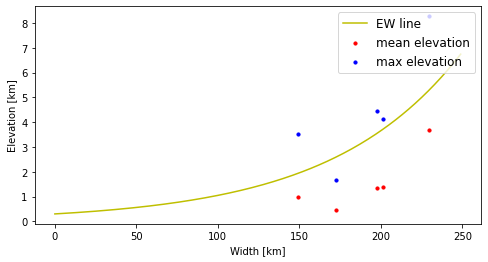

In [30]:
figname = "Width vs elevation of selected cases"
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.set(xlabel='Width [km]', ylabel='Elevation [km]') #,xticks=xticks,yticks=yticks,title=fname_fig)
ax.scatter(ws_plot[indexs] ,elevmean_plot[indexs]/1000,s =10, color="red",label="mean elevation")
ax.scatter(ws_plot[indexs] ,elevmax_plot[indexs]/1000,s =10, color="blue",label="max elevation")
ax.plot(xx,yy,c="y",label="EW line")
#plt.axis(extent_fig)
plt.legend(loc = 'upper right',prop = {'size':12}) 
plt.savefig((outputPath+figname+'.png'),dpi=dpi,bbox_inches='tight')

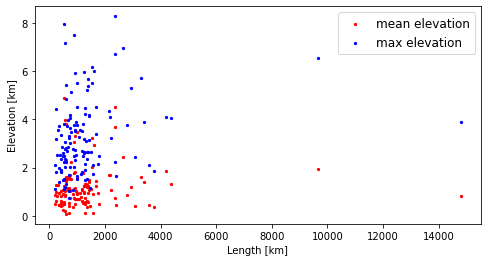

In [31]:
figname = "Length vs elevation"
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.set(xlabel='Length [km]', ylabel='Elevation [km]') #,xticks=xticks,yticks=yticks,title=fname_fig)
ax.scatter(ls_plot ,elevmean_plot/1000,s =5, color="red",label="mean elevation")
ax.scatter(ls_plot ,elevmax_plot/1000,s =5, color="blue",label="max elevation")
#plt.axis(extent_fig)
plt.legend(loc = 'upper right',prop = {'size':12}) 
plt.savefig((outputPath+figname+'.png'),dpi=dpi,bbox_inches='tight')

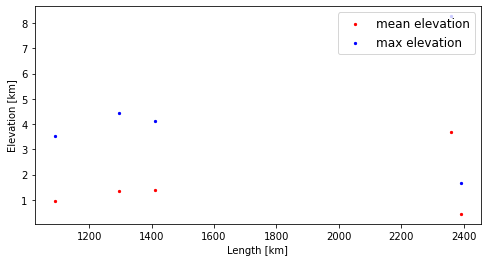

In [32]:
figname = "Length vs elevation of selected cases"
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.set(xlabel='Length [km]', ylabel='Elevation [km]') #,xticks=xticks,yticks=yticks,title=fname_fig)
ax.scatter(ls_plot[indexs],elevmean_plot[indexs]/1000,s =5, color="red",label="mean elevation")
ax.scatter(ls_plot[indexs] ,elevmax_plot[indexs]/1000,s =5, color="blue",label="max elevation")
#plt.axis(extent_fig)
plt.legend(loc = 'upper right',prop = {'size':12}) 
plt.savefig((outputPath+figname+'.png'),dpi=dpi,bbox_inches='tight')

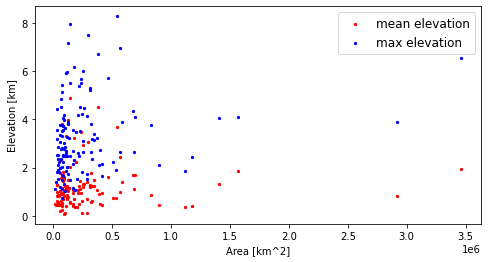

In [33]:
figname = "Area vs elevation"
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.set(xlabel='Area [km^2]', ylabel='Elevation [km]') #,xticks=xticks,yticks=yticks,title=fname_fig)
ax.scatter(ls_plot*ws_plot ,elevmean_plot/1000,s =5, color="red",label="mean elevation")
ax.scatter(ls_plot*ws_plot ,elevmax_plot/1000,s =5, color="blue",label="max elevation")
#plt.axis(extent_fig)
plt.legend(loc = 'upper right',prop = {'size':12}) 
plt.savefig((outputPath+figname+'.png'),dpi=dpi,bbox_inches='tight')